<a href="https://colab.research.google.com/github/milkadata/Prediction-of-Product-Sales/blob/main/FINAL_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction-of-Product-Sales
*Milka Santana*

## Project Overview

## Load and Inspect Data

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd

In [95]:
filename = '/content/drive/MyDrive/Colab Notebooks/2. WEEK 5/Assignments/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [97]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

###Drop item identifier

In [98]:
df=df.drop(['Item_Identifier'], axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Duplicate

In [99]:
df.duplicated().sum()

0

### Fix Inconsistancies

In [100]:
df.nunique()

Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [101]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [102]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Reg')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
Reg         117
Name: Item_Fat_Content, dtype: int64

#Missing values

In [103]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


#Split 

In [135]:
# Split
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Imputers, Pipelines & Transformers

In [106]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [107]:
# Imputers (ABC)
freq_imputer = SimpleImputer(strategy='most_frequent')
# Imputers (#)
mean_imputer = SimpleImputer(strategy='mean')
# Scaler (#)
scaler = StandardScaler()
# One-hot encoder (ABC)
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


In [108]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [109]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [110]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d488b47c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d488b68c0>)])

In [111]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d488b47c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d488b68c0>)])

In [112]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [113]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 43)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

#REGRESSION MODELS

##Linear Regression model & Evaluation to predict sales

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d488b47c0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d488b68c0>)])),
                ('linearregression', LinearRegression())])

In [116]:
# Make predictions using the training and testing data
train_pred = linreg_pipe.predict(X_train)
test_pred = linreg_pipe.predict(X_test)
train_pred[:10]

array([3812.8984375, 2661.8984375, 2611.0234375, 1482.8984375,
       1874.3984375,  -62.7265625, 1596.1484375, 5656.1484375,
       4203.1484375, 2046.0234375])

In [117]:
#Evaluate model based on R2
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Train R2: {train_r2}')
print(f'Test R2:{test_r2}')

Train R2: 0.5616051768157606
Test R2:0.5678828515187102


In [118]:
#Evaluate model based on RMSE
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Train RMSE: {train_RMSE}')
print(f'Test RMSE:{test_RMSE}')

Train RMSE: 1139.0391282623034
Test RMSE:1092.812515892554


In [119]:
# Evaluatation SUMMARY
r2 = r2_score(y_train, train_pred)
rmse = mean_squared_error(y_train, train_pred, squared=False)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print("R-squared:", r2)
print("RMSE:", rmse)

Linear Regression Model Evaluation:
R-squared: 0.5616051513364001
RMSE: 1139.0391282623034


##Regression TREE model & evaluation to predict sales

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
#instantiate the model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [122]:
#fit
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [123]:
#predict
train_preds_tree = dec_tree.predict(X_train_processed)
test_preds_tree = dec_tree.predict(X_test_processed) 

In [124]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [125]:
#Evaluate model based on R2
tree_train_score = r2_score(y_train, train_preds_tree)
tree_test_score = r2_score(y_test, test_preds_tree)
print(tree_train_score)
print(tree_test_score)

1.0
0.19442428951375335


In [126]:
#Evaluate model based only  RMSE
tree_train_rmse = mean_squared_error(y_train, train_preds_tree, squared=False)
tree_test_rmse = mean_squared_error(y_test, test_preds_tree, squared=False)

print(f'Train RMSE: {tree_train_rmse}')
print(f'Test RMSE:{tree_test_rmse}')

Train RMSE: 5.50728349323243e-15
Test RMSE:1490.8269815241015


In [127]:
# Evaluatation SUMMARY
r2_tree = r2_score(y_train, train_preds_tree)
rmse_tree= mean_squared_error(y_train, train_preds_tree, squared=False)

# Print evaluation metrics
print("Regression Tree Model Evaluation:")
print("R-squared:", r2_tree)
print("RMSE:", rmse_tree)

Regression Tree Model Evaluation:
R-squared: 1.0
RMSE: 5.50728349323243e-15


## Model Comparison and Recommendation:

 - I recommend the Linear Regression Model 
 - Regression Tree Model has a perfect fit to the training data (R-squared of 1) and a low RMSE. This looks like overfitting, the model may not perform well on unseen data. 
 2) the Linear Regression Model has a lower R-squared, but is less prone to overfitting, and the RMSE suggests reasonable accuracy in predicting sales.

#Data Visualization

##Histograms

CONCLUTIONS: SUPERMARKET 1 gets highest sales
Prices between 100 -200 have higher sales

Text(0, 0.5, 'Number of Sales')

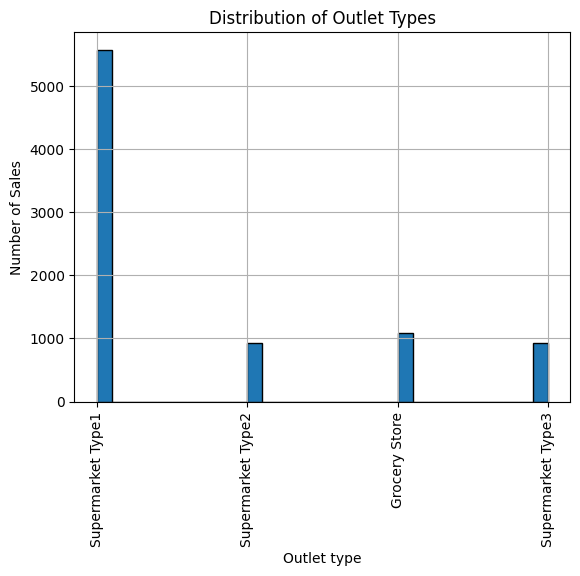

In [128]:
ax= df['Outlet_Type'].hist(bins =30, edgecolor= 'black')
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of Outlet Types')
ax.set_xlabel('Outlet type')
ax.set_ylabel('Number of Sales')


Text(0, 0.5, 'Number of Sales')

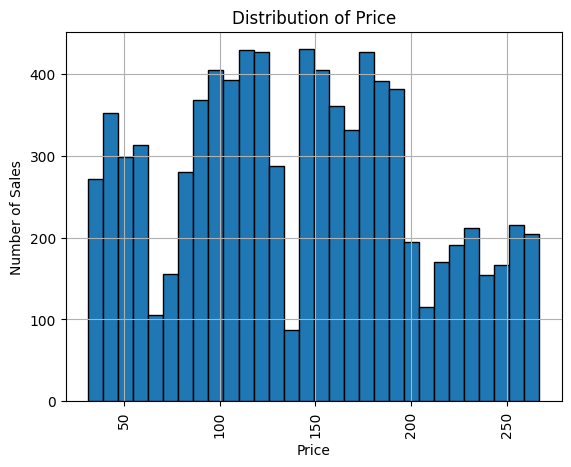

In [129]:
ax2= df['Item_MRP'].hist(bins =30, edgecolor= 'black')
ax2.tick_params(axis='x',rotation=90)
ax2.set_title('Distribution of Price')
ax2.set_xlabel('Price')
ax2.set_ylabel('Number of Sales')

##Boxplot

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

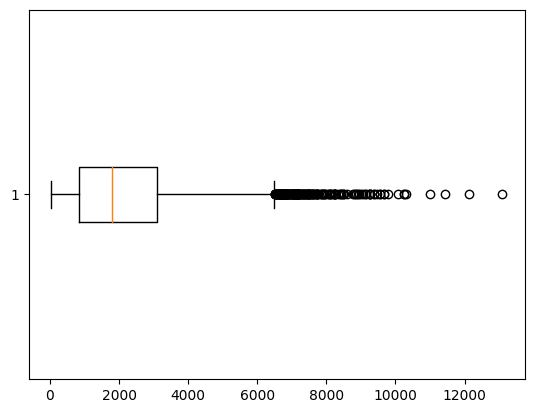

In [131]:
fig, ax = plt.subplots()
data = df['Item_Outlet_Sales']
ax.boxplot([data],vert =False);

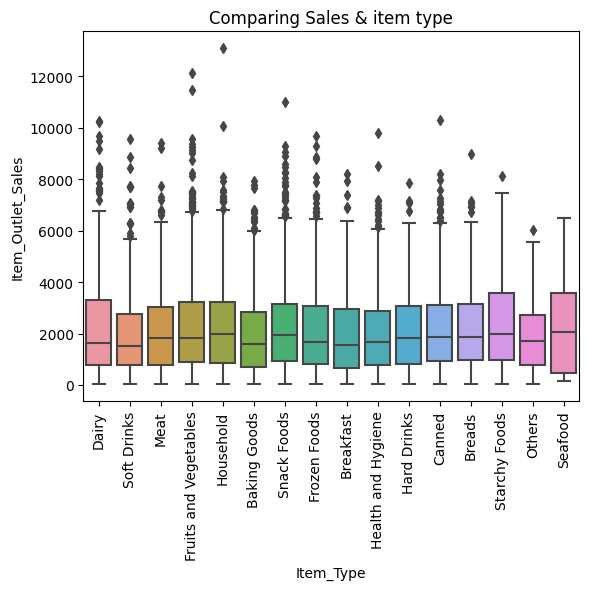

In [132]:
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales',data=df)
ax.set_title('Comparing Sales & item type')
ax.tick_params(axis='x',rotation=90)

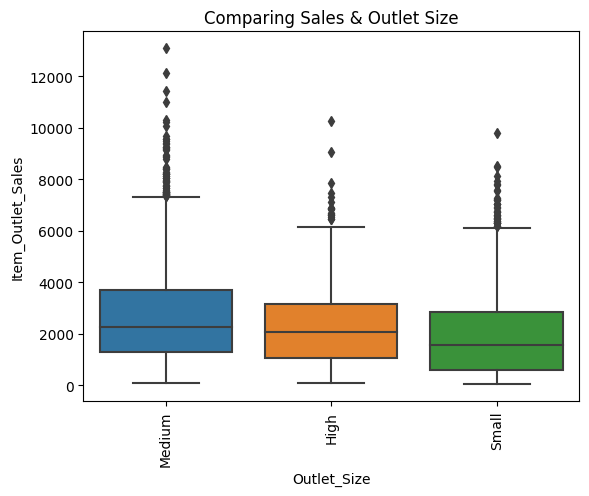

In [133]:
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales',data=df)
ax.set_title('Comparing Sales & Outlet Size')
ax.tick_params(axis='x',rotation=90)